# Machine Learning with a Heart

The purpose of our project is to create a machine learning model to predict whether or not a person has heart disease based on a variety of factors. Heart disease is the leading cause of death in the United States, with 1 of 4 deaths. Learning about causes of heart problems and healthy habits to prevent heart disease can be beneficial in the long run. Early detection of heart disease can be an effective technique to reducing deaths from heart diseases. 

In our broader problem domain, our research would help doctors predict cases of heart disease based on the patient’s health history and habits. The Center of Disease Control and Prevention mentions that early action is important for heart attacks. There are also risk factors such as high blood pressure and high cholesterol putting Americans at a higher risk for heart disease.

We will be using a dataset that comes from the DrivenData “Warm Up: Machine Learning with a Heart” competition. The dataset is from a study of heart disease and includes measurements on patient health and cardiovascular statistics. It is provided by the Cleveland Heart Disease Database via the UCI Machine Learning Repository.

In [1]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# for training our model
train_values = pd.read_csv('./data/train_values.csv', index_col='patient_id')
train_labels = pd.read_csv('./data/train_labels.csv', index_col='patient_id')

## Data Prep

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.model_selection import train_test_split # splitting data
from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline           # for making pipelines
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.linear_model import LogisticRegression

# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing parameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [30]:
train_labels = pd.read_csv('data/train_labels.csv')
train_values = pd.read_csv('data/train_values.csv')
test_values = pd.read_csv('data/test_values.csv')
submission_format = pd.read_csv('data/submission_format.csv')

train_values.drop(['patient_id'], axis=1, inplace=True)
test_values.drop(['patient_id'], axis=1, inplace=True)
train_labels.drop(['patient_id'], axis=1, inplace=True)

train_values['thal'] = train_values['thal'].apply(lambda thal: 0 if thal == 'normal' else 1)
test_values['thal'] = test_values['thal'].apply(lambda thal: 0 if thal == 'normal' else 1)

all_data = train_values.join(train_labels)
df = (train_values.join(train_labels))

heart_disease_present = all_data[all_data.heart_disease_present == 1]
no_heart_disease = all_data[all_data.heart_disease_present == 0]

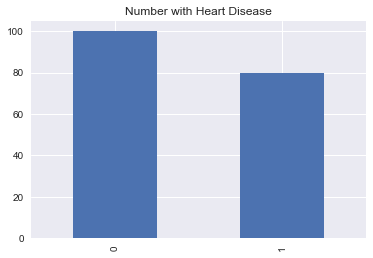

In [23]:
train_labels.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')


In [24]:
corr = df.corr()

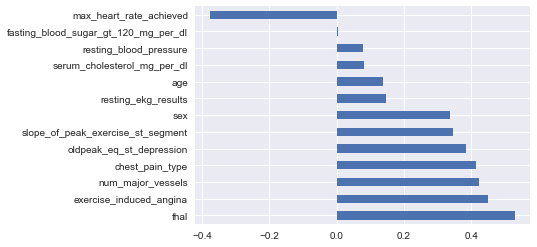

In [25]:
# correlation
(corr
     .heart_disease_present
     .drop('heart_disease_present') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [26]:
corr.sort_values(by = ["heart_disease_present"]).drop(["heart_disease_present"]).heart_disease_present


max_heart_rate_achieved                -0.375352
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_blood_pressure                  0.078506
serum_cholesterol_mg_per_dl             0.079775
age                                     0.138255
resting_ekg_results                     0.145933
sex                                     0.335421
slope_of_peak_exercise_st_segment       0.344224
oldpeak_eq_st_depression                0.382930
chest_pain_type                         0.412829
num_major_vessels                       0.421519
exercise_induced_angina                 0.448647
thal                                    0.528812
Name: heart_disease_present, dtype: float64

The following features chosen has the highest correlation. I will be using the selectted features in my machine learning algorithm (logistic regression)

In [27]:
#Features with high correlation - from kresta's analysis
selected_features = ['max_heart_rate_achieved', 
                     'oldpeak_eq_st_depression', 
                     'chest_pain_type', 
                     'num_major_vessels',
                       'exercise_induced_angina']
train_values_subset = train_values[selected_features]

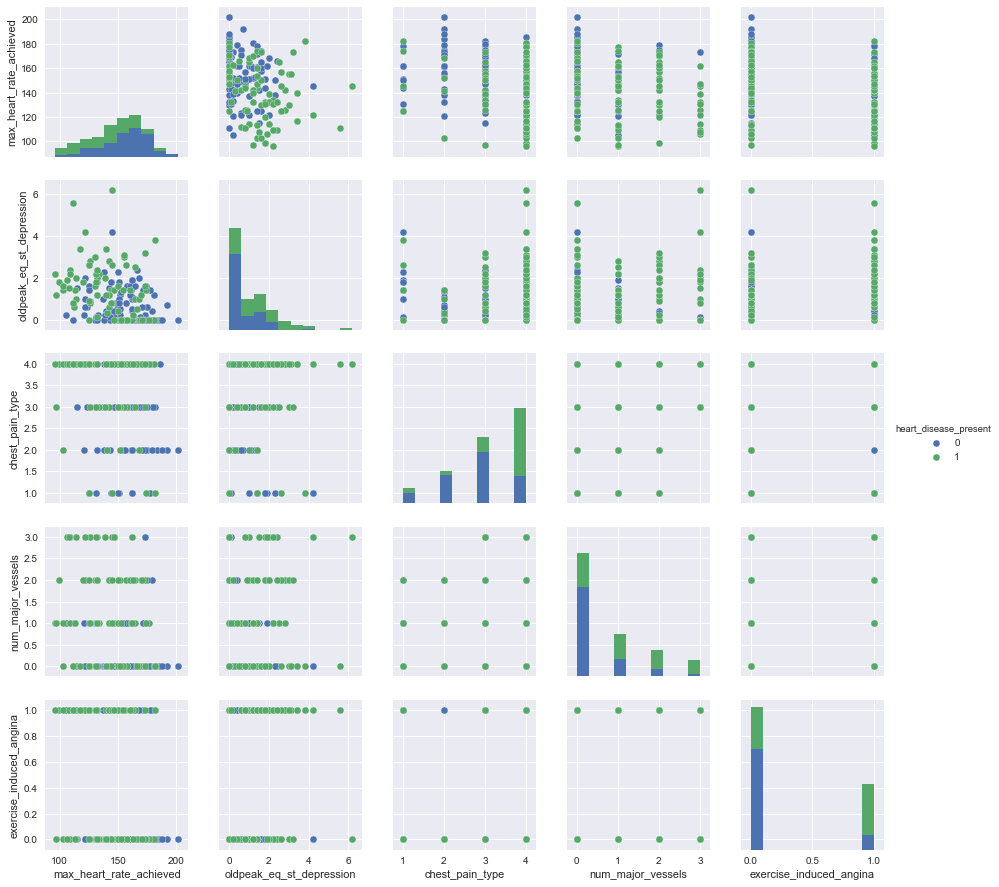

In [28]:
sns.pairplot(train_values.join(train_labels), 
             hue='heart_disease_present', 
             vars=selected_features)

In [31]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go

x1=heart_disease_present.max_heart_rate_achieved 
x2=no_heart_disease.max_heart_rate_achieved

chart1 =go.Histogram(
    x=x1, 
    name='heart disease present')

chart2 =go.Histogram(x=x2, 
                     name='no heart disease')

data  = [chart1, chart2]
layout = go.Layout(
    title='Heart Disease Present by Max Heart Rate Achieved',
    xaxis=dict(
        title='Max Rate Heart Achieved'
    ),
    yaxis=dict(
        title='Count'
    ),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')

In [35]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly
import plotly.graph_objs as go
import numpy as np

x1=heart_disease_present.age
x2=no_heart_disease.age
trace1 = go.Histogram(
    x=x1,
    name='Heart Disease Present',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x2,
    name='No Heart Disease Present',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(
    title='Heart Disease Present by Age',
    xaxis=dict(
        title='Age'
    ),
    yaxis=dict(
        title='Count'
    ),
    barmode='overlay'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')


In [36]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.linear_model import LogisticRegression

# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing parameters of the pipeline
from sklearn.model_selection import GridSearchCV




## Scale Data

In [ ]:
scaler = MinMaxScaler()
test_df = scaler.fit_transform(test_values)
train_values = scaler.fit_transform(train_values)

train_features, test_features, train_outcome, test_outcome = train_test_split(
    train_values,
    train_labels['heart_disease_present'],
    test_size = 0.3,
    random_state = 11
)

### Random Forest

With random forest regressor, using feature selection of variance threshold and select threshold, the results were submitted to drivendata. Drivendata uses the log loss to calculate its score. Random forest gave a log loss of 0.54774. This is still below our model using logistic regression.

In [61]:
# Random Forest Regressor
rfr_reg = RandomForestRegressor()
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
selecter = SelectPercentile()
threshold = VarianceThreshold(.1)

# make pipeline
pipe = make_pipeline(threshold, scaler, selecter, rfr_reg)

# set parameters
params = {"randomforestregressor__n_estimators": range(1,20),
         'selectpercentile__percentile':range(10, 30, 3),
}

#perform grid search
grid_search = GridSearchCV(pipe, param_grid=params)
grid_search.fit(train_values, train_labels['heart_disease_present'])
grid_search.cv_results_['params'][grid_search.best_index_]

# grid search fit to training data
pred_train = grid_search.fit(train_features, train_outcome).predict(test_features)

In [38]:
# grid search fit to entire dataset
preds = grid_search.fit(train_values, train_labels['heart_disease_present']).predict(train_values)

In [39]:
# print results to csv
submission_format = submission_format.drop(['heart_disease_present'], axis = 1)
submission_format['heart_disease_present'] = pd.Series(preds)
submission_format.to_csv('random_forest_submission.csv',index=False)

### KNN Regressor

In [40]:
# Peform Grid Search
params = {"n_neighbors": range(1, 40), "weights":["uniform", "distance"]}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=params, cv = folds, return_train_score=True)
grid_search.fit(train_features, train_outcome)
grid_search.best_params_

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'n_neighbors': 9, 'weights': 'uniform'}

In [42]:
# KNN with best params from grid search
best_knn =  KNeighborsRegressor(n_neighbors = 4, weights='distance')
knn_preds = best_knn.fit(train_features, train_outcome).predict(test_features)
knn_preds

array([0.        , 0.        , 0.7457516 , 0.44156566, 0.        ,
       0.30425025, 0.22692818, 1.        , 0.51622051, 0.50195129,
       0.        , 0.80091064, 0.2971867 , 0.47553239, 0.        ,
       0.49374955, 1.        , 0.8156642 , 1.        , 0.23618368,
       0.30374805, 0.30283704, 1.        , 0.        , 0.        ,
       0.        , 0.23084918, 0.        , 0.2491859 , 1.        ,
       0.74479283, 0.        , 0.        , 0.63190453, 0.        ,
       1.        , 0.74022738, 0.        , 0.75345216, 0.21037925,
       0.49210332, 0.71344389, 0.77769355, 0.32433686, 0.76127652,
       0.75801542, 0.17834717, 0.48171902, 1.        , 0.75639268,
       0.69306642, 1.        , 0.        , 0.        ])

In [43]:
# fit model with all data
knn_clf_full = best_knn.fit(train_values_subset, train_labels['heart_disease_present'])

test_values_subset = test_values[selected_features]

knn_pred = knn_clf_full.predict(test_values_subset)

# print to submission format
submission_format['heart_disease_present'] = pd.Series(knn_pred, dtype=np.float64)
submission_format.to_csv('VanessaSubmission.csv',index=False)

### Logistic Regression

In [44]:
pipe = Pipeline(steps=[('scale', StandardScaler()), 
                       ('logistic', LogisticRegression())])
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [45]:
param_grid = {'logistic__C': [1], 
              'logistic__penalty': ['l2']}
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  cv=100)
gs.fit(train_values_subset, train_labels.heart_disease_present)
gs.best_params_

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'logistic__C': 1, 'logistic__penalty': 'l2'}

In [46]:
test_values = pd.read_csv('./data/test_values.csv', index_col='patient_id')
test_values_subset = test_values[selected_features]
predictions = gs.predict_proba(test_values_subset)[:, 1]
submission_format = pd.read_csv('./data/submission_format.csv', index_col='patient_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.to_csv('log_submission.csv')


### MLP Regressor

In [47]:
clf = MLPRegressor(solver='lbfgs')

pipe = make_pipeline(scaler, clf)

params = {'learning_rate': ["constant", "invscaling", "adaptive"]}

gs = GridSearchCV(clf, param_grid=params, n_jobs=-1, verbose=2, cv=10)

gs.fit(train_features, train_outcome)
gs.score(test_features, test_outcome)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.5s finished
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



-0.16635529978877472

In [48]:
pred = gs.fit(train_features, train_outcome).predict(test_features).astype(np.float64)
pred2 = gs.fit(train_values, train_labels['heart_disease_present']).predict(train_values).astype(np.float64)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.3s finished


In [49]:
submission_format = pd.read_csv('data/submission_format.csv')
submission_format = submission_format.drop(['heart_disease_present'], axis = 1)
submission_format['heart_disease_present'] = pd.Series(predictions)
submission_format.to_csv('test_regressor.csv',index=False)

In [57]:
compare = pd.read_csv('./data/train_labels.csv')
values = pd.read_csv('./data/train_values.csv')
compare['predictions'] = pred2
compare['age'] = values.age
compare['sex'] = values.sex

present = compare[compare.heart_disease_present == 1]
notPresent = compare[compare.heart_disease_present == 0]

heart_disease_present = go.Scatter(
    x = present.age,
    y = present.predictions,
    mode = 'markers',
    name = "1",
    marker = dict( size = 10,
            color = '#4da6ff',
            line = dict(width = 1)
    )
)

heart_disease_not_present = go.Scatter(
    x = notPresent.age,
    y = notPresent.predictions,
    mode = 'markers',
    name = "0",
    marker = dict( size = 10,
            color = '#ff8080',
            line = dict(width = 1)
)
)
data1 = [heart_disease_present,heart_disease_not_present]
    
layout1 = dict(title= 'Age v Predicted Probability of Heart Disease',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Age',
    ),
    yaxis=dict(
        title= 'Predicted Probability of Heart Disease',
    )
)

fig = go.Figure(data=data1, layout=layout1)
iplot(fig)

In [60]:
# Plot for age v probability of heart disease
heart_disease_present2 = go.Scatter(
    x = present.sex,
    y = present.predictions,
    mode = 'markers', 
    name = "1",
    marker = dict(size= 14,
            color = '#4da6ff',
            line = dict(width = 1),
            opacity = 0.2
    )
)

heart_disease_not_present2 = go.Scatter(
    x = notPresent.sex,
    y = notPresent.predictions,
    mode = 'markers',
    name = '0',
    marker = dict(size= 14,
            color = '#ff8080',
            line = dict(width = 1),
            opacity = 0.2      
)
)
data2 = [heart_disease_present2,heart_disease_not_present2]
    
layout2 = dict(title= 'Sex v Predicted Probability of Heart Disease',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Sex',
    ),
    yaxis=dict(
        title= ' Predicted Probability of Heart Disease',
    )
)

fig = go.Figure(data=data2, layout=layout2)
iplot(fig)